<a href="https://colab.research.google.com/github/yashx007/ML/blob/main/A1_Height_Weight_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     height    weight
0  65.78331  112.9925
1  71.51521  136.4873
2  69.39874  153.0269
3  68.21660  142.3354
4  67.78781  144.2971
(25000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  25000 non-null  float64
 1   weight  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB
None
height    0
weight    0
dtype: int64


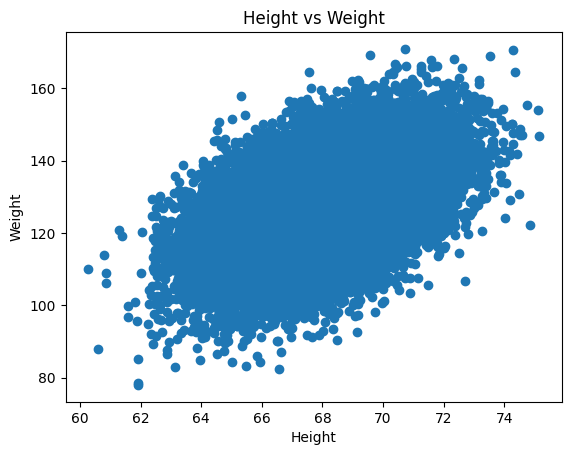

Intercept: 127.06924639893332
Slope: [5.82227372]
R2 score: 0.2593047494927634
MAE: 8.041117903549644
RMSE: 10.116668677022487
Predicted weight for height 180 cm: 471.1730791817347


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


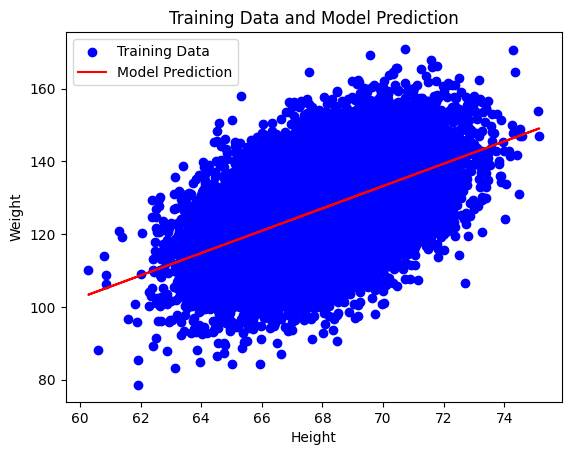

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Load dataset
df = pd.read_csv("/content/HeightWeight.csv")

# Display first 5 rows
print(df.head())

# Check dataset shape and info
print(df.shape)  # Expected: (50, 2)
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Define features and target
X = df[['height']]
y = df['weight']

# Scatter plot of original data
plt.scatter(X, y)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Model parameters
print('Intercept:', lr_model.intercept_)
print('Slope:', lr_model.coef_)

# Predict on test data
y_pred = lr_model.predict(X_test_scaled)

# Evaluate model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Predict weight for a new height value (e.g., 180 cm)
new_height_scaled = scaler.transform([[180]])
prediction = lr_model.predict(new_height_scaled)
print(f'Predicted weight for height 180 cm: {prediction[0]}')

# Plot training data and model prediction
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, lr_model.predict(X_train_scaled), color='red', label='Model Prediction')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Training Data and Model Prediction")
plt.legend()
plt.show()
